In [ ]:
多点线性插值
给出一组数据：

x = [0, 2, 4, 6, 8]
y = [0, 4, 2, 4, 8]
请完成下列任务：

在 x=5 时用线性插值估算 y；

在 x=1 和 x=7 时分别插值；

用图像展示插值结果与原数据。

[3.84375 2.34375 6.34375]
[3.5625 2.4375 6.0625]


poly1d([-0.03125   ,  0.58333333, -3.375     ,  6.66666667,  0.        ])

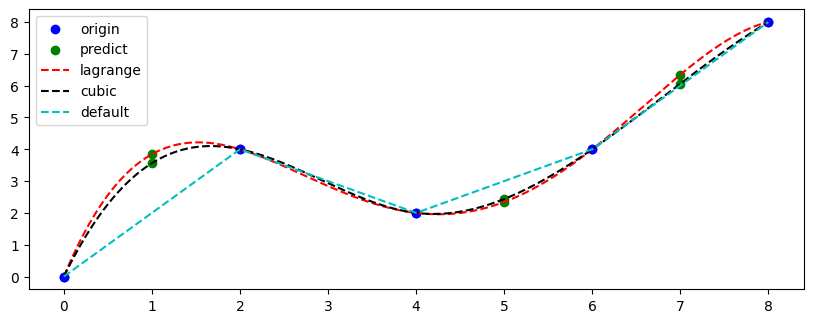

In [50]:
import numpy as np
from scipy.interpolate import lagrange, interp1d
import matplotlib.pylab as plt
x=np.array([0,2,4,6,8])
y=np.array([0,4,2,4,8])
x0=np.linspace(0,8,1000)#注意取点应该在原来点的范围内
x1=np.array([1,5,7])
fun=lagrange(x,y)
fun2=interp1d(x,y,'cubic')
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.scatter(x,y,color='blue',label='origin')
plt.scatter(x1,fun(x1),color='green',label='predict')
plt.plot(x0,fun(x0),'--r',label='lagrange')
plt.scatter(x,y,color='blue')
plt.scatter(x1,fun2(x1),color='green')
plt.plot(x0,fun2(x0),'--k',label='cubic')
plt.plot(x,y,'--c',label='default')
plt.legend()
print(fun(x1))
print(fun2(x1))
fun

In [ ]:
反向线性插值（求 x 值）
已知数据如下：

x = [10, 20, 30, 40]
y = [100, 150, 200, 250]
若 y=175，请用线性插值法估算对应的 x 值。

In [53]:
x=np.array([10,20,30,40])
y=np.array([100,150,200,250])
fun=lagrange(y,x)
y0=175
fun(y0)

24.99999999999997

In [ ]:
题目 1：线性拟合（最小二乘法）
给定以下数据点：

x	0	1	2	3	4	5
y	1	2	1.8	3.5	4.6	5.9

要求：

使用最小二乘法进行线性拟合，找到拟合的直线方程 

y=ax+b。

绘制数据点和拟合的直线。

array([0.97142857, 0.7047619 ])

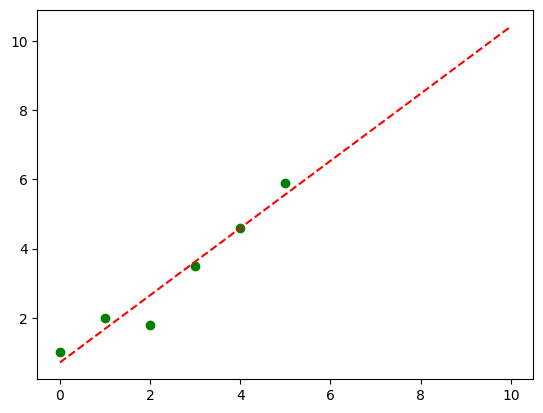

In [64]:
import numpy as np
import matplotlib.pylab as plt
x=np.arange(6)
y=np.array([1,2,1.8,3.5,4.6,5.9])
fun=np.polyfit(x,y,1)
x0=np.linspace(0,10,1000)
plt.plot(x0,np.polyval(fun,x0),'--r')
plt.scatter(x,y,color='green')
fun

In [ ]:
题目 2：多项式拟合（2阶或更高阶）
给定以下数据点：

x	0	1	2	3	4	5
y	2	4.1	6.9	8.5	10.2	13.3

要求：

使用多项式拟合，尝试拟合一个二次（2阶）多项式 
y=ax^2+bx+c。

绘制数据点和拟合的二次曲线。

(array([ 1.70714286, -9.06714286, 17.68571429]),
 array([[  0.5552602 ,  -2.77630102,   1.85086735],
        [ -2.77630102,  15.0660602 , -12.21572449],
        [  1.85086735, -12.21572449,  17.02797959]]))

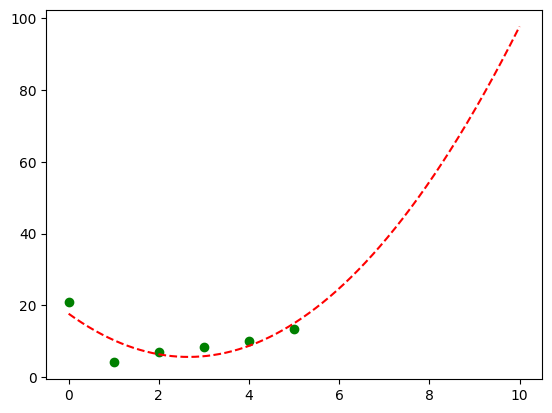

In [96]:
x=np.arange(6)
y=np.array([21,4.1,6.9,8.5,10.2,13.3])
var,cov=np.polyfit(x,y,2,cov=True)
x0=np.linspace(0,10,1000)
plt.plot(x0,np.polyval(var,x0),'--r')
plt.scatter(x,y,color='green')
var,cov

In [ ]:
题目 3：指数拟合
给定以下数据点：

x	0	1	2	3	4	5
y	1	2.71	7.39	20.08	54.6	148.4

要求：

假设数据遵循指数函数形式 

y=a*e^(bx)

使用最小二乘法进行拟合。
绘制数据点和拟合的指数曲线。

(array([1.00004756, 0.99997414]),
 array([[ 1.53943891e-07, -3.15389518e-08],
        [-3.15389518e-08,  6.51128029e-09]]))

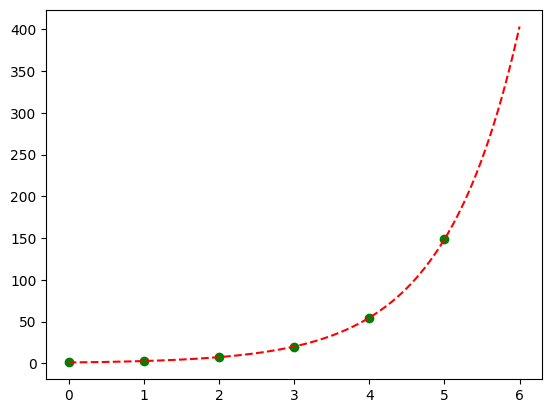

In [97]:
from scipy.optimize import curve_fit
x=np.arange(6)
y=np.array([1,2.71,7.39,20.08,54.6,148.4])
x0=np.linspace(0,6,1000)
def fun(x,a,b):
    return a*np.exp(b*x)
var,cov=curve_fit(fun,x,y)
y_fit=fun(x0,*var)
plt.scatter(x,y,color='green')
plt.plot(x0,y_fit,'--r')
var,cov

In [ ]:
题目 4：对数拟合
给定以下数据点：

x	1	2	3	4	5	6
y	0.7	1.1	1.3	1.5	1.7	1.8

要求：

假设数据遵循对数函数形式 

y=a*ln(x)+b，使用最小二乘法进行拟合。

绘制数据点和拟合的对数曲线。

(array([0.61459022, 0.67607609]),
 array([[ 0.00065134, -0.00071422],
        [-0.00071422,  0.00102151]]))

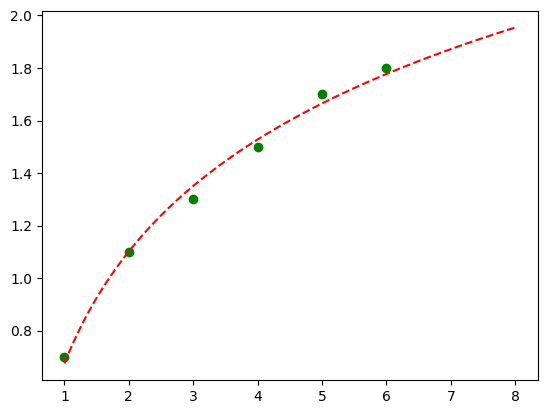

In [138]:
x=np.arange(1,7,1)
y=np.array([0.7,1.1,1.3,1.5,1.7,1.8])
x0=np.linspace(1,8,1000)
def fun(x,a,b):
    return a*np.log(x)+b
var,cov=curve_fit(fun,x,y)
y_fit=fun(x0,*var)
plt.plot(x0,y_fit,'--r')
plt.scatter(x,y,color='green')
var,cov

In [ ]:
题目 5：分段线性拟合
给定以下数据点：

x	0	1	2	3	4	5
y	1	2	4	7	11	16

要求：

使用分段线性拟合，拟合两段线性函数，第一段拟合区间为 x∈[0,2]，第二段拟合区间为 x∈[3,5]。

绘制数据点和分段拟合的直线。

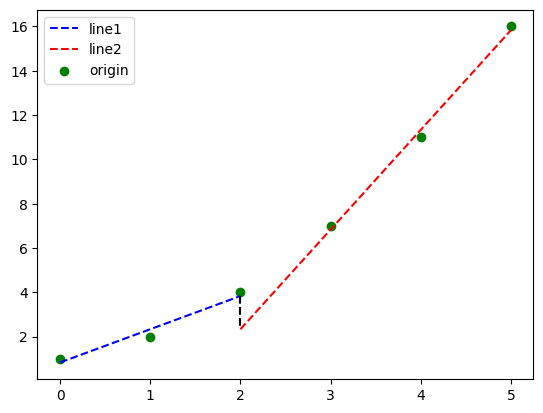

In [132]:
x1=np.arange(3)
x2=np.arange(3,6)
y1=np.array([1,2,4])
y2=np.array([7,11,16])
x3=np.linspace(0,2,100)
x4=np.linspace(2,5,100)
var1=np.polyfit(x1,y1,1)
var2=np.polyfit(x2,y2,1)
y3=np.polyval(var1,x3)
y4=np.polyval(var2,x4)
plt.plot(x3,y3,'--b',label='line1')
plt.plot(x4,y4,'--r',label='line2')
plt.plot([2,2],[np.polyval(var1,2),np.polyval(var2,2)],'--k')
plt.scatter(x1,y1,color='green',label='origin')
plt.scatter(x2,y2,color='green')
plt.legend()


In [ ]:
题目 6：样条拟合
给定以下数据点：

x	0	1	2	3	4	5
y	1	1.5	2	3.5	3	5

要求：

使用样条插值方法（如 CubicSpline）进行拟合。

绘制数据点和拟合的样条曲线。

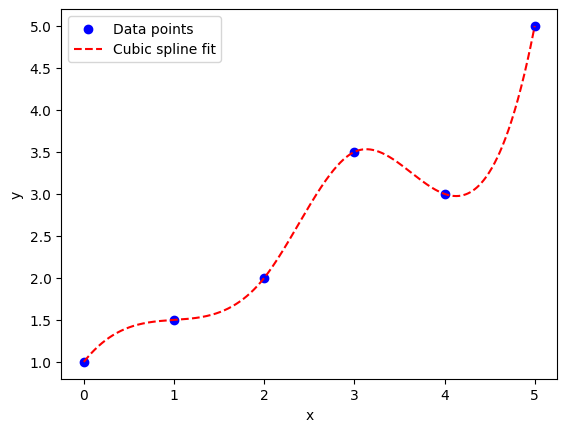

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# 数据点
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 1.5, 2, 3.5, 3, 5])

# 样条插值拟合
cs = CubicSpline(x, y)#这里直接给出函数

# 绘制样条拟合的曲线
x_fine = np.linspace(0, 5, 1000)
y_fine = cs(x_fine)

# 绘制数据点和拟合的样条曲线
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_fine, y_fine,'--r', label='Cubic spline fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
题目 7：平滑曲线拟合
给定以下数据点：

x	0	1	2	3	4	5	6
y	5	7	11	18	25	35	48

要求：

使用局部加权回归（如 Lowess）来平滑数据并拟合曲线。

绘制数据点和平滑拟合的曲线。

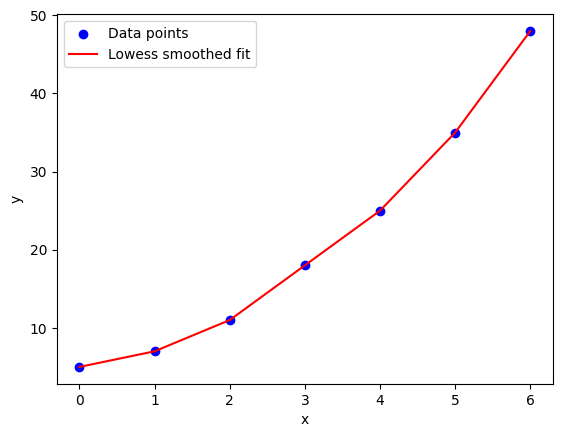

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# 数据点
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([5, 7, 11, 18, 25, 35, 48])

# 使用 Lowess 平滑拟合
smoothed = lowess(y, x, frac=0.5)

# 绘制平滑拟合的曲线
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Lowess smoothed fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
